In [184]:
!wget https://raw.githubusercontent.com/nimishbongale/MLFromScratch/master/Assignment-MLP/data.csv

--2020-05-07 14:36:15--  https://raw.githubusercontent.com/nimishbongale/MLFromScratch/master/Assignment-MLP/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119889 (117K) [text/plain]
Saving to: ‘data.csv.12’

data.csv.12         100%[===================>] 117.08K  --.-KB/s    in 0.04s   

2020-05-07 14:36:15 (2.92 MB/s) - ‘data.csv.12’ saved [119889/119889]



In [0]:
from random import randrange #for generating a random range
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline 

In [0]:
#Load CSV as an array dataframe
def read_csv(filename):
    dataset = [] #empty dataset
    data = open(filename,'r').readlines() 
    #open csv file in read mode, read data
    for r in data: 
      #loop through every line in data
      row=r.split(',') 
      # remove , and convert string to array
      temp=list(map(float,row[:-1])) 
      #convert string datapoints to float
      if row[-1]=='M\n': 
        #convert last predicted value to boolean 
        temp.append(1) 
        #M=0, malignant
      else:
        temp.append(0) 
        #B=0, benign
      dataset.append(temp) 
      #append the real dataset
    return dataset[:len(dataset)-100] 
    #the final dataset generated as an array of arrays

In [0]:
#Split dataset into k parts (or folds)
#folds= equally sized randomized samples
def cross_valid_split(dataset, n): 
    temp = list() 
    #the split of the data we build the fold with
    dataset_copy = list(dataset) 
    #maintain a temporary copy
    fold_size = len(dataset) // n 
    #n= number of folds
    for i in range(n): 
      #loop through folds
        fold = list() #empty fold
        while len(fold) < fold_size: 
            #while fold size hasnt reached the required limit
            index = randrange(0, len(dataset_copy)) 
            #take a random size sample
            fold.append(dataset_copy.pop(index)) 
            #take it from the dataset copy
        temp.append(fold) 
        #append it to the final folds array
    return temp 

In [0]:
# Compute accuracy
def find_acc_metrics(act, pred):
    tn,tp,fn,fp,= 0,0,0,0 
    #true negatve, true positive, false negative, false positive
    # 1=True, 0=False
    for i in range(len(act)): 
        if act[i] == 1 and pred[i]==1: 
            tp+=1
        elif act[i]==1 and pred[i]==0:
            fn+=1
        elif act[i]==0 and pred[i]==1:
            fp+=1
        else: 
            tn+=1
    #Accuracy, Confusion Matrix, Precision, Recall
    return [(tn+tp)/(tn+tp+fn+fp),str(tp)+'  '+str(fn)+'\n'+str(fp)+'  '+str(tn),tp/(tp+fp),tp/(tp+fn)]

In [0]:
def eval_algo(dataset, algo, n, *args):
    folds = cross_valid_split(dataset, n) 
    #get folds
    scores = list() 
    #list of accuracies
    for i in range(len(folds)): 
        #for every fold
        train_set = list(folds) 
        #your training set will be all the folds minus the current fold
        train_set.remove(folds[i]) 
        #remove current fold 
        train_set = sum(train_set, []) 
        test_set = list() 
        #empty test set
        actual=list()
        for row in folds[i]:
            row_copy = list(row) 
            #get entire row in the fold
            actual.append(row_copy[-1]) 
            #append the true value
            row_copy[-1] = None 
            #set the to predict attribute to "None"
            test_set.append(row_copy) 
            #append it into the test set
        
        predicted = algo(train_set, test_set, *args) 
        #get predictions from the MLP algorithm
        metrics = find_acc_metrics(actual, predicted) 
        #calculate the metrics
        print('-------Fold',i+1,'------')
        print('*****Hyperparameters*****') #print the hyperparameters
        print('Completed Cumulative Epochs: ',5000*(i+1)) #print results after nth epoch
        print('Learning rate: ',0.02,'\n') #alpha 
        print('*****Metrics*****')
        print('Accuracy: ',metrics[0]) 
        print('Confusion Matrix:\n'+metrics[1])
        print('Precision: ',metrics[2])
        print('Recall: ',metrics[3],'\n')
        scores.append(metrics[0]) #append into scores
    return scores

In [0]:
#Activation function is a step function , Sigmoid, RELU, tanh may also be used 
#0 for <0 and 1 for >=0
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i] 
        #input to the activation function
    return 1.0 if activation>= 0.0 else 0.0 
    #The ideal step function , which works like an on off switch

In [0]:
def train_w(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))] 
    #initialize with 0 weights
    for epoch in range(n_epoch): 
      # for every epoch mentioned
        sum_error = 0.0  
        #error=0 initially
        for row in train: 
          #for every value in train
            prediction = predict(row, weights) 
            #carry out a prediction either 0 or 1
            error = row[-1] - prediction 
            #calculate error
            #take the sum square of the error per epoch ()
            sum_error += error**2 
            #add it to the squared sum error
            weights[0] = weights[0] + l_rate * error #our bias 
            #loop over each weight and update for a row in each epoch
            for i in range(len(row)-1): 
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i] 
                #Update all the subsequent weights
        error_graph_data.append((epoch, sum_error)) 
        # for every epoch, append its error
        #loss function plot
    return weights #return the updated weights

In [0]:
def plotit(error_graph_data,a): 
  #functions to plot the loss functions
  x=[error_graph_data[i+5000*a][0] for i in range(0,5000)] 
  #x values for 5000 epochs
  y=[error_graph_data[i+5000*a][1] for i in range(0,5000)] 
  #y values for 5000 epochs
  ax=sns.lineplot(x,y) 
  #make a lineplot x vs y
  ax.set_title('----------------Fold '+str(a+1)+' loss function/Squared sum plot-------------------') 
  #Fold outputs
  ax.set(xlabel='Epochs',ylabel='Squared Error') 
  #labels for axes
  plt.show() 
  #show the plot



In [0]:
# Perceptron Algorithm (SGD included)
def perceptron(train, test, l_rate, n_epoch):
    predictions = list() 
    #initial empty predicitons 
    weights = train_w(train, l_rate, n_epoch) 
    #get updated trained weights  
    stor_weights.append(weights)
    for row in test: 
        #for every entry in test
        prediction = predict(row, weights) 
        #carry out predictions
        predictions.append(prediction) 
    return predictions #array of predictions

Breast Cancer Dataset: 
 [[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189, 1], [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902, 1], [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758, 1], [11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.2575, 0.6638, 0.173, 1],

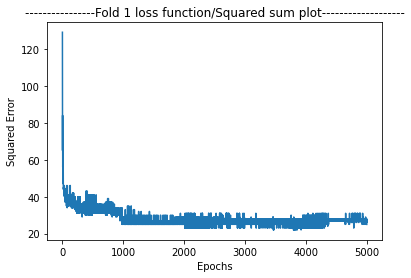

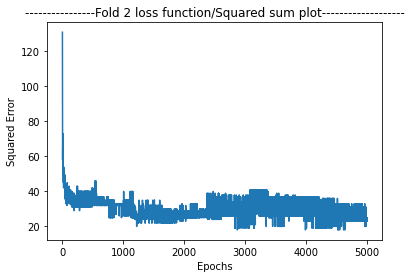

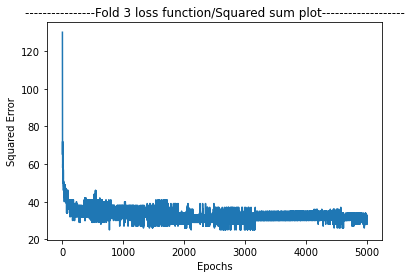

All Accuracy Scores:  [0.9166666666666666, 0.9294871794871795, 0.9358974358974359]
Average Accuracy:  0.9273504273504273

Initial start weights: 
[-104.13999999999642, -794.4995200006247, 10.980600000005719, -2103.2621999985945, -70.41400000001883, 8.17711659999962, 75.43269260002252, 100.71642437998428, 45.74649423998519, 8.772802000002642, 2.315701600000226, -13.315530000002498, 175.4736719998741, 325.87666400014035, 386.92863999981546, 1.0480562800001212, 14.346441380000647, 15.878066945995196, 5.759578960003035, -0.5672930000001379, 1.3201809999997678, -836.4976800002439, 1109.158200000493, 435.8464000001353, 202.6120000000368, 19.024087599995624, 236.64839160004456, 266.8345318401351, 94.62918519996448, 14.712374000000212, 20.582269600010076]

Updated Final Weights: 
[-108.7399999999955, -757.5479200004116, 530.4817999998903, -1747.7129999986446, -28.50599999997699, 15.595627200002415, 87.0583008000227, 120.4820400460201, 55.960056759999276, 9.797832000005318, 4.555329000000307, -

In [194]:
filename = 'data.csv' #our dataset
dataset = read_csv(filename) #load it
print('Breast Cancer Dataset: \n',dataset,'\n')

n_folds = 3 
#each time, a 33.33% test and a 66.66% train split is obtained
l_rate = 0.02 
#learning rate
n_epoch = 5000 
#number of training epochs per step fold

error_graph_data = list() 
#get error for every iteration
stor_weights = list() 
#store the weights
print('-#-#-#-#-#-Training phase with k-fold Cross Validation-#-#-#-#-#-')
scores = eval_algo(dataset, perceptron, n_folds, l_rate, n_epoch)
#evaluate the perceptron algorithm

print('Results obtained in every run:\n')
# printing data to be graphed
print(error_graph_data)

for i in range(3):
  plotit(error_graph_data,i)
#plot 3 graphs

print('All Accuracy Scores: ',scores)
#All accuracies printed
print('Average Accuracy: ',sum(scores)/len(scores))
#Average accuracy

print('\nInitial start weights: ')
print(stor_weights[0])
#first appended weight
w_test = stor_weights[-1]
#last appended weight
print('\nUpdated Final Weights: ')
print(w_test,'\n')

print("-#-#-#-#-#-Printing test results for an unseen dataset (100 rows) -#-#-#-#-#-\nActual  Predicted")
act,pred=[],[]
for i in range(100):
    print(dataset[len(dataset)-i-1][30],'\t', predict(dataset[len(dataset)-i-1], w_test))
    act.append(dataset[len(dataset)-i-1][30])
    #append the actual values
    pred.append(predict(dataset[len(dataset)-i-1], w_test))
    #append the predicted values

metrics=find_acc_metrics(act,pred)
#find testing accuracy metrics
print('\nAccuracy: ',metrics[0])
print('Confusion Matrix:\n'+metrics[1])
print('Precision: ',metrics[2])
print('Recall: ',metrics[3])

# Justification and Conclusion

A simple Single Layer Perceptron algorithm was run on the breast cancer dataset using K-Folds Cross Validation and SGD. The testing accuracy obtained was around 92.7% in the training dataset and 93% on an unseen dataset, among other relevant metrics.

The three graphs obtained show the squared error sum function for every epoch, and for every considered fold. As we can see, the error diminishes as the number of iterations increase. 